In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


With one hidden layer
Training Accuracy 74.79%
Testing Accuracy 73.50%

With two hidden layers
Training Accuracy 75.57%
Testing Accuracy 73.00%


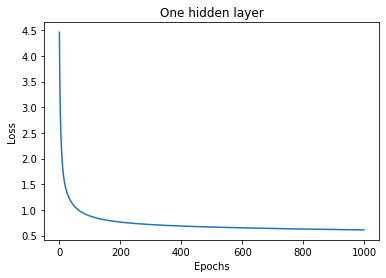

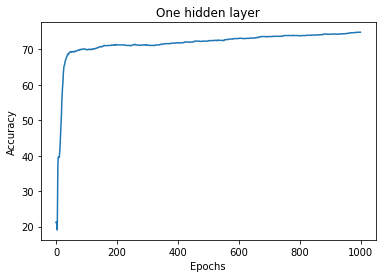

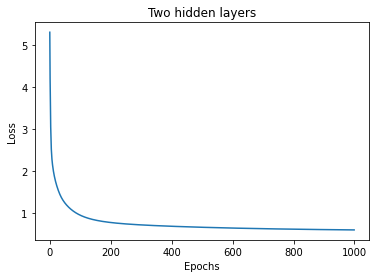

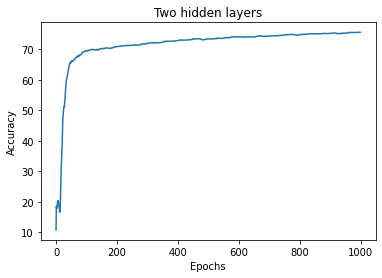

In [4]:
def sftmx(z):
    return np.exp(z) / np.sum(np.exp(z), axis=0)

def sigmoid(x):
	return 1/(1+np.exp(-x))


def encoding_init_y(y,n_labels):
	n_samples=y.shape[0]
	encoded_y=np.zeros((n_labels,n_samples))
	for j in range(n_samples):

		classindx=int(y[j])-1
		encoded_y[classindx,j]=1

	return encoded_y

def params_init(num_x,hidden_sizes,num_y):
	H_1,H_2=hidden_sizes[:]
	W1=np.random.normal(0,1,size=(H_1,num_x))
	b1=np.zeros((H_1,1))
	if(H_2!=0):
		W2=np.random.normal(0,1,size=(H_2,H_1))
		b2=np.zeros((H_2,1))
		W3=np.random.normal(0,1,size=(num_y,H_2))
		b3=np.zeros((num_y,1))
		return np.array([W1,b1,W2,b2,W3,b3],dtype=object)
	
	W2=np.random.normal(0,1,size=(num_y,H_1))
	b2=np.zeros((num_y,1))
	return np.array([W1,b1,W2,b2],dtype=object)

def loss_fn(calc, real):
    n_samples = real.shape[0]
    logp = - np.log(calc[np.arange(n_samples), real.argmax(axis=1)])
    loss = np.sum(logp)/n_samples
    return loss

def accuracy_calc(y_calc,labels):
	return np.sum(y_calc==labels)/len(labels)*100

def fwd_propagate(X,mult_param,hidden_sizes):
	H_1,H_2=hidden_sizes[:]
	if(H_2==0):
		W1,b1,W2,b2=mult_param
		Z1=W1@X+b1
		A1=sigmoid(Z1)
		Z2=W2@A1+b2
		A2=sftmx(Z2)
		mult_nodes=np.array([Z1,A1,Z2,A2],dtype=object)
	else:
		W1,b1,W2,b2,W3,b3=mult_param
		Z1=W1@X+b1
		A1=sigmoid(Z1)
		Z2=W2@A1+b2
		A2=sigmoid(Z2)
		Z3=W3@A2+b3
		A3=sftmx(Z3)
		mult_nodes=np.array([Z1,A1,Z2,A2,Z3,A3],dtype=object)

	return mult_nodes

def grad_fn(mult_nodes,mult_param,X,y,hidden_sizes):
	H_1,H_2=hidden_sizes[:]
	m=X.shape[1]
	if(H_2==0):
		W1,b1,W2,b2=mult_param
		Z1,A1,Z2,A2=mult_nodes
		dz2=(A2-y)
		dw2=dz2@(A1.T)/m
		db2=np.sum(dz2,axis=1,keepdims=True)/m
		da1=(W2.T)@dz2
		dz1=da1*(A1*(1-A1))
		dw1=dz1@(X.T)/m
		db1=np.sum(dz1,axis=1,keepdims=True)/m
		grad_param=np.array([dw1,db1,dw2,db2],dtype=object)

	else:
		W1,b1,W2,b2,W3,b3=mult_param
		Z1,A1,Z2,A2,Z3,A3=mult_nodes
		dz3=(A3-y)
		dw3=dz3@(A2.T)/m
		db3=np.sum(dz3,axis=1,keepdims=True)/m
		da2=(W3.T)@dz3
		dz2=da2*(A2*(1-A2))
		dw2=dz2@(A1.T)/m
		db2=np.sum(dz2,axis=1,keepdims=True)/m
		da1=(W2.T)@dz2
		dz1=da1*(A1*(1-A1))
		dw1=dz1@(X.T)/m
		db1=np.sum(dz1,axis=1,keepdims=True)/m
		grad_param=np.array([dw1,db1,dw2,db2,dw3,db3],dtype=object)
	
	return grad_param

def grad_desc_fn(X,y,eta,epochs,hidden_sizes,batch_size):
	H_1,H_2=hidden_sizes[:]
	n_labels=y.shape[0]
	errors=np.array([])
	mult_accuracy=np.array([])
	mult_param=params_init(X.shape[0],hidden_sizes,n_labels)
	
	for j in range(epochs):
		#temp=X.T
		#np.random.shuffle(temp)
		#X=temp.T
		#X=X[:,0:batch_size]
		mult_nodes=fwd_propagate(X,mult_param,hidden_sizes)
		grad_param=grad_fn(mult_nodes,mult_param,X,y,hidden_sizes)
		mult_param-=eta*grad_param
		calc=mult_nodes[-1]
		
		loss=loss_fn(calc.T,y.T)
		#print("Loss: {:.2f}".format(loss))
		errors=np.append(errors,loss)
		calc_labels=np.argmax(calc,axis=0)+1
		acc=accuracy_calc(calc_labels,train_labels)
		mult_accuracy=np.append(mult_accuracy,acc)

		
		

	return mult_param,errors,mult_accuracy

def stdize(X):
	X = (X-np.mean(X,axis= 1,keepdims=True)) / np.std(X,axis= 1,keepdims=True)
	return X



def plot(errors,title,ylabel):
	plt.title(title)
	plt.plot(errors)
	plt.xlabel('Epochs')
	plt.ylabel(ylabel)
	plt.show()



data=pd.read_csv(r'E:\BITS\Yr 3 Sem 2\BITS F464 Machine Learning\Assignments\Assignment 2\2B\dataset_NN.csv')
data=data.to_numpy()
np.random.shuffle(data)


eta=0.5
epochs=1000


n_labels=10


n=len(data)
len_train=int(0.7*n)


train=data[0:len_train]
x_train,y_train=(train[:,:-1].T,train[:,-1].T)
train_labels=y_train
x_train=stdize(x_train)
y_train=y_train.reshape(len(y_train),1)
y_train=encoding_init_y(y_train,n_labels)


test=data[len_train:n]
x_test,y_test=(test[:,:-1].T,test[:,-1].T)
test_labels=y_test
x_test=stdize(x_test)
y_test=y_test.reshape(len(y_test),1)
y_test=encoding_init_y(y_test,n_labels)


batch_size=int(0.5*x_train.shape[1])

hidden_sizes=[20,0]
print("With one hidden layer")


mult_param,errors1,mult_accuracy1=grad_desc_fn(x_train,y_train,eta,epochs,hidden_sizes,batch_size)
train_calc=np.argmax(fwd_propagate(x_train,mult_param,hidden_sizes)[-1],axis=0)+1
train_acc=accuracy_calc(train_calc,train_labels)
print("Training Accuracy {:.2f}".format(train_acc)+"%")


test_calc=np.argmax(fwd_propagate(x_test,mult_param,hidden_sizes)[-1],axis=0)+1
test_acc=accuracy_calc(test_calc,test_labels)
print("Testing Accuracy {:.2f}".format(test_acc)+"%\n")

hidden_sizes=[20,20]
print("With two hidden layers")
mult_param,errors2,mult_accuracy2=grad_desc_fn(x_train,y_train,eta,epochs,hidden_sizes,batch_size)
train_calc=np.argmax(fwd_propagate(x_train,mult_param,hidden_sizes)[-1],axis=0)+1
train_acc=accuracy_calc(train_calc,train_labels)
print("Training Accuracy {:.2f}".format(train_acc)+"%")


test_calc=np.argmax(fwd_propagate(x_test,mult_param,hidden_sizes)[-1],axis=0)+1
test_acc=accuracy_calc(test_calc,test_labels)
print("Testing Accuracy {:.2f}".format(test_acc)+"%")


plot(errors1,'One hidden layer','Loss')
plot(mult_accuracy1,'One hidden layer','Accuracy')
plot(errors2,'Two hidden layers','Loss')
plot(mult_accuracy2,'Two hidden layers','Accuracy')